In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk import chunk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import numpy  as np

In [3]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [9]:
spam_df =r"C:\Users\balaj\Desktop\spam.csv"

In [12]:
spam_df =pd.read_csv(r"C:\Users\balaj\Desktop\spam.csv",encoding='latin-1')

In [13]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [17]:
spam_df.shape

(5572, 5)

In [19]:
spam_df.drop('Unnamed: 2',inplace=True,axis=1)

In [20]:
spam_df.drop('Unnamed: 3',inplace=True,axis=1)

In [21]:
spam_df.drop('Unnamed: 4',inplace=True,axis=1)

In [23]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [24]:
spam_df['v1']= spam_df['v1'].replace(['spam','ham'],[1,0])

In [25]:
spam_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# text preprocessing

In [30]:
lemmatize_words=[]
ls=WordNetLemmatizer()
words=[]
for i in spam_df.v2:
    data=re.sub(r'[^a-z0-9]',' ',i)
    words.append(i.lower())
for i in words:
    lemmatize_words.append(ls.lemmatize(i))
    word_stops=[]
for i in lemmatize_words:
    if i not in stopwords.words('english'):
        word_stops.append(i)
    

In [31]:
len(words)

5572

In [32]:
words

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had y

In [59]:
cv =CountVectorizer()

In [60]:
cvft =cv.fit_transform(word_stops).toarray()

In [61]:
cvft

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
tf =TfidfVectorizer()

In [64]:
x_tfft =tf.fit_transform(word_stops).toarray()

In [49]:
cvft.shape

(5572, 8672)

In [65]:
x_tfft.shape

(5572, 8672)

In [48]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [41]:
tf.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [51]:
y =spam_df['v1'].values

In [52]:
y.shape

(5572,)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x_tfft,y,test_size=0.25,random_state=101)

In [68]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((4179, 8672), (1393, 8672), (1393,), (4179,))

In [69]:
model_mb = MultinomialNB()
model_mb =model_mb.fit(x_train,y_train)

In [70]:
model_mb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [74]:
predictions =model_mb.predict(x_test)

In [75]:
accuracy_score(y_test,predictions)

0.9619526202440776

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1214
           1       1.00      0.70      0.83       179

   micro avg       0.96      0.96      0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



In [78]:
confusion_matrix(y_test,predictions)

array([[1214,    0],
       [  53,  126]], dtype=int64)

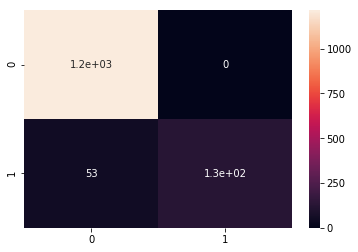

In [80]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()